In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [5]:
value=df.isnull().sum(axis=1)#in here axis=1 row not column
print(value)

0         3
1         4
2         3
3         4
4         2
         ..
145455    4
145456    4
145457    4
145458    2
145459    6
Length: 145460, dtype: int64


In [6]:
value.value_counts()#da y3ni masln rows ely kan feha 4 null kan 3addhom 28675 rows

,count
0,56420
4,28675
2,18346
1,10909
6,10229
3,9782
5,4141
7,2277
8,1072
12,781


In [7]:
df=df[df.isnull().sum(axis=1)<=8]

In [8]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,230
MaxTemp,215
Rainfall,2048
Evaporation,60031
Sunshine,66818
WindGustDir,7682
WindGustSpeed,7651
WindDir9am,8587


In [9]:
np.shape(df)

(141851, 23)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
num_columns=df.select_dtypes(include=['number']).columns
num_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [12]:
cat_feature=df.select_dtypes(include=['object']).columns
cat_feature

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [14]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
df[num_columns]=knn.fit_transform(df[num_columns])

In [17]:
from sklearn.impute import SimpleImputer
simple=SimpleImputer(strategy='most_frequent')
df[cat_feature]=simple.fit_transform(df[cat_feature])

In [18]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [19]:
df.to_csv('Rain_AUS.csv', index=False)

In [10]:

df['Date']=df['Date'].dt.month

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,Albury,13.4,22.9,0.6,5.64,8.66,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.2,16.9,21.8,No,No
1,12,Albury,7.4,25.1,0.0,8.08,9.80,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.6,1.6,17.2,24.3,No,No
2,12,Albury,12.9,25.7,0.0,4.52,9.50,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.4,2.0,21.0,23.2,No,No
3,12,Albury,9.2,28.0,0.0,4.04,7.20,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,2.8,1.8,18.1,26.5,No,No
4,12,Albury,17.5,32.3,1.0,5.12,10.46,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
df.duplicated().sum()

180

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
def column_info(data):
    cols=[]
    dtype=[]
    unique_v=[]
    nunique=[]

    for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype.name)
        unique_v.append(data[col].unique())
        nunique.append(data[col].nunique())

    return pd.DataFrame({'Column':cols,"Data type":dtype,"Unique Values":unique_v,"num_unique values":nunique})


In [17]:
column_info(df)

,Column,Data type,Unique Values,num_unique values
0,Date,int32,"[12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",12
1,Location,object,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M...",49
2,MinTemp,float64,"[13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ...",950
3,MaxTemp,float64,"[22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26....",1031
4,Rainfall,float64,"[0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, 16.8...",979
5,Evaporation,float64,"[5.64, 8.08, 4.5200000000000005, 4.04, 5.12, 4...",1362
6,Sunshine,float64,"[8.66, 9.8, 9.500000000000002, 7.2, 10.46, 8.4...",1146
7,WindGustDir,object,"[W, WNW, WSW, NE, NNW, N, NNE, SW, ENE, SSE, S...",16
8,WindGustSpeed,float64,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80....",273
9,WindDir9am,object,"[W, NNW, SE, ENE, SW, SSE, S, NE, N, SSW, WSW,...",16


In [18]:
df['Evaporation']=df['Evaporation'].round(3)# convert number from 4.5200000000000005 to 4.52
df['Sunshine']=df['Sunshine'].round(3)

In [19]:
column_info(df)

,Column,Data type,Unique Values,num_unique values
0,Date,int32,"[12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",12
1,Location,object,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M...",49
2,MinTemp,float64,"[13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ...",950
3,MaxTemp,float64,"[22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26....",1031
4,Rainfall,float64,"[0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, 16.8...",979
5,Evaporation,float64,"[5.64, 8.08, 4.52, 4.04, 5.12, 4.88, 4.76, 5.2...",860
6,Sunshine,float64,"[8.66, 9.8, 9.5, 7.2, 10.46, 8.4, 10.06, 10.1,...",638
7,WindGustDir,object,"[W, WNW, WSW, NE, NNW, N, NNE, SW, ENE, SSE, S...",16
8,WindGustSpeed,float64,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80....",273
9,WindDir9am,object,"[W, NNW, SE, ENE, SW, SSE, S, NE, N, SSW, WSW,...",16


In [20]:
df['MaxTemp'].unique()

array([22.9 , 25.1 , 25.7 , ..., 24.56, 22.38, 16.76])

In [21]:
df['MaxTemp'].value_counts()

,count
MaxTemp,
20.00,886
19.00,845
19.80,840
20.40,834
19.90,824
...,...
27.22,1
22.98,1
17.64,1


In [22]:
# Get value counts for 'MaxTemp' column
value_counts = df['MaxTemp'].value_counts()

# Print each value with its count
for value, count in value_counts.items():
    print(f"Value: {value}, Count:{count}")

Value: 20.0, Count:886
Value: 19.0, Count:845
Value: 19.8, Count:840
Value: 20.4, Count:834
Value: 19.9, Count:824
Value: 20.8, Count:820
Value: 18.5, Count:812
Value: 19.5, Count:812
Value: 21.0, Count:811
Value: 20.2, Count:806
Value: 19.6, Count:805
Value: 18.2, Count:805
Value: 18.9, Count:802
Value: 21.2, Count:800
Value: 19.4, Count:798
Value: 18.8, Count:793
Value: 25.0, Count:789
Value: 18.0, Count:786
Value: 17.8, Count:785
Value: 20.1, Count:785
Value: 17.0, Count:782
Value: 22.2, Count:778
Value: 18.4, Count:774
Value: 22.0, Count:771
Value: 22.5, Count:767
Value: 20.7, Count:764
Value: 19.2, Count:762
Value: 21.5, Count:762
Value: 17.5, Count:762
Value: 20.3, Count:761
Value: 21.4, Count:759
Value: 19.1, Count:758
Value: 20.5, Count:758
Value: 20.9, Count:757
Value: 23.0, Count:756
Value: 19.3, Count:756
Value: 23.4, Count:751
Value: 21.1, Count:750
Value: 21.8, Count:748
Value: 22.4, Count:745
Value: 19.7, Count:742
Value: 22.6, Count:737
Value: 21.7, Count:737
Value: 21.3

In [24]:
for col in df.columns:
    if col in num_columns:
        df[col] = df[col].round(3)

In [25]:
df.describe()
#have outlier in rainfall/evaporation/windgustspeed/windspeed9am

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000,145280.000000
mean,6.399257,12.193431,23.220295,2.350652,5.239584,8.059867,39.752465,14.031882,18.638991,68.949046,51.565017,1017.762041,1015.407001,3.967700,4.066511,16.967686,21.690757
std,3.427497,6.381258,7.103276,8.401357,3.361857,3.020685,13.293506,8.885864,8.750529,18.938944,20.596770,6.858431,6.800121,2.612899,2.426959,6.487334,6.894868
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,3.000000,7.600000,18.000000,0.000000,3.240000,6.600000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,1.600000,2.000000,12.300000,16.700000
50%,6.000000,12.000000,22.600000,0.000000,4.800000,8.780000,37.000000,13.000000,19.000000,70.000000,52.000000,1017.800000,1015.400000,3.600000,4.000000,16.700000,21.200000
75%,9.000000,16.800000,28.200000,0.800000,6.520000,10.100000,46.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1020.000000,7.000000,6.200000,21.500000,26.400000
max,12.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


#Visualization

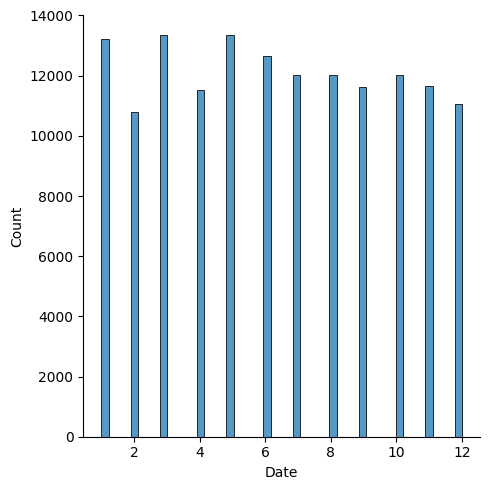

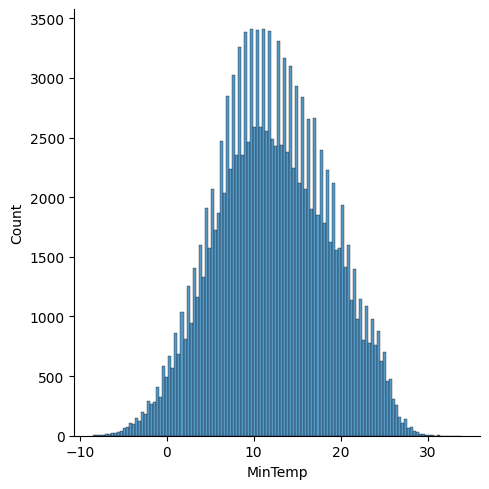

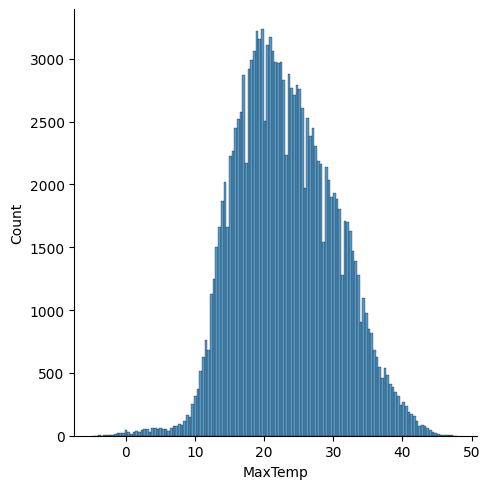

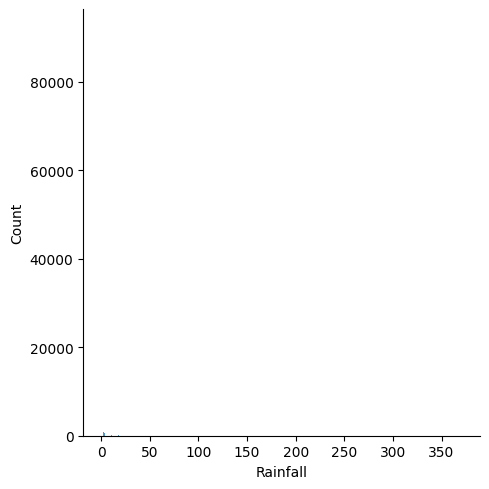

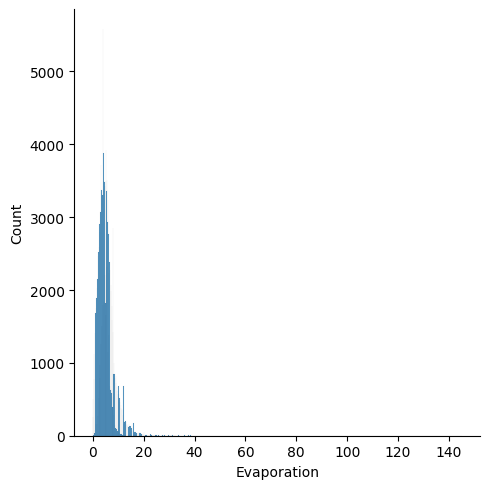

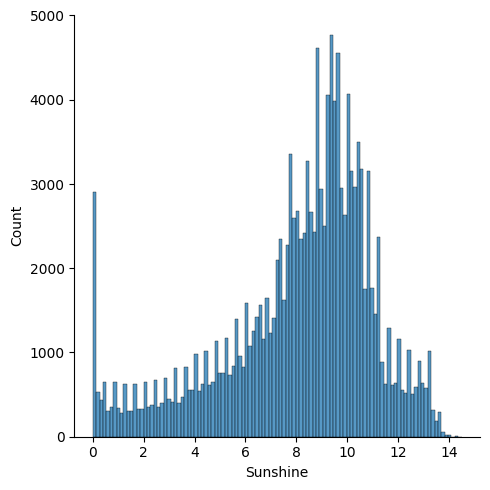

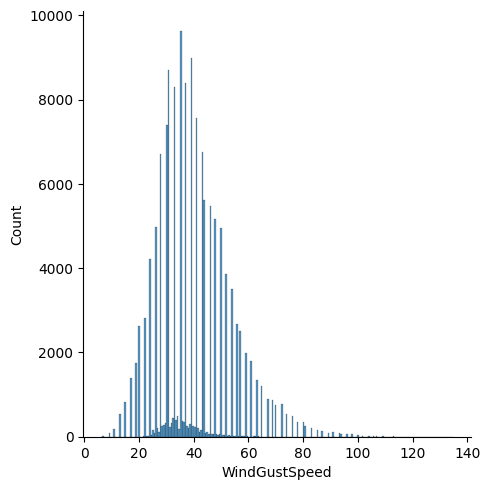

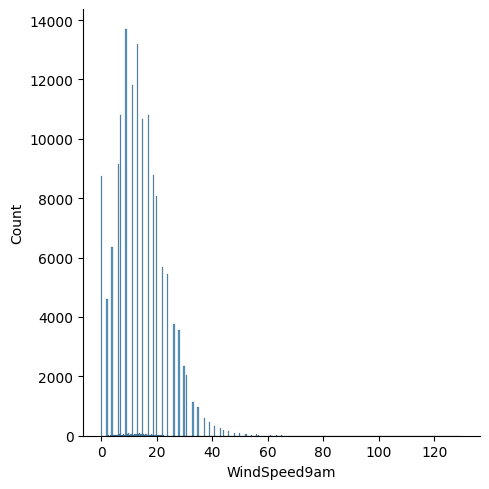

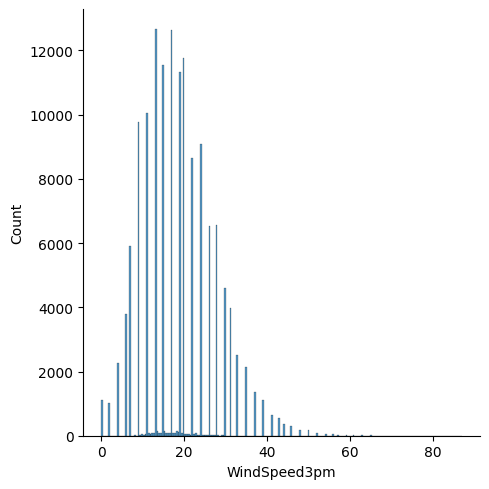

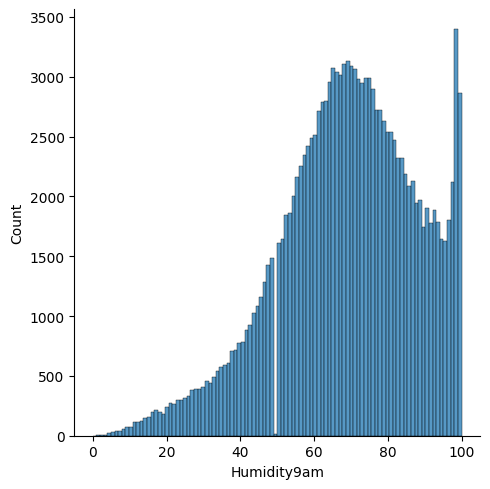

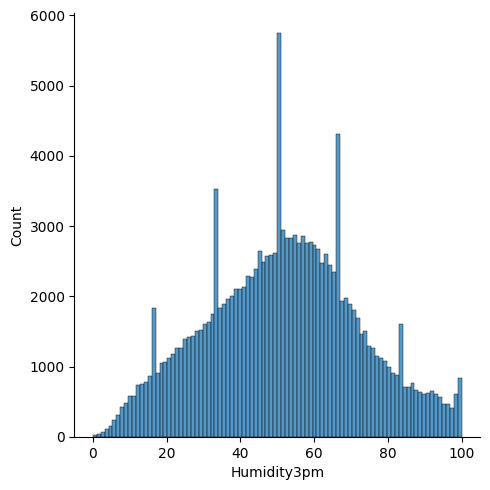

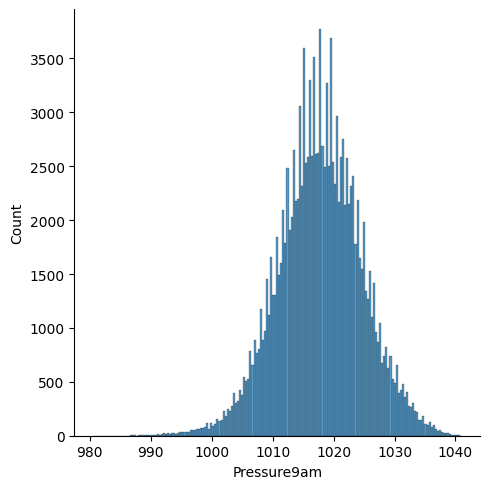

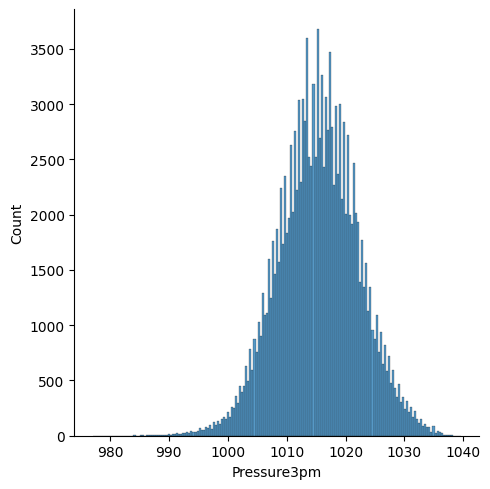

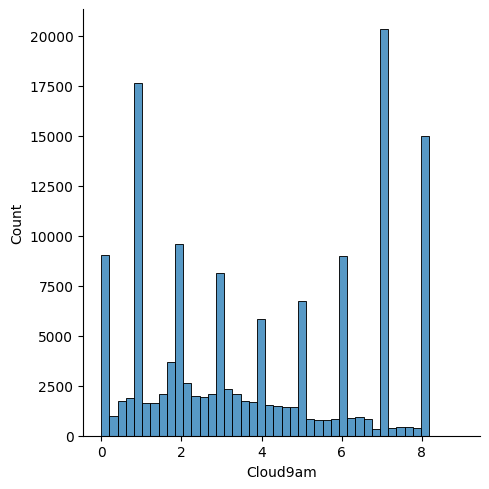

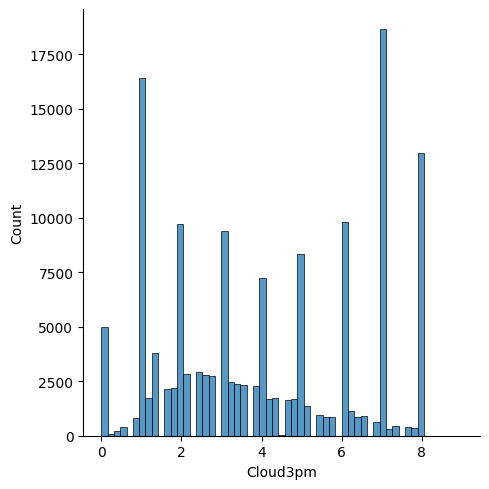

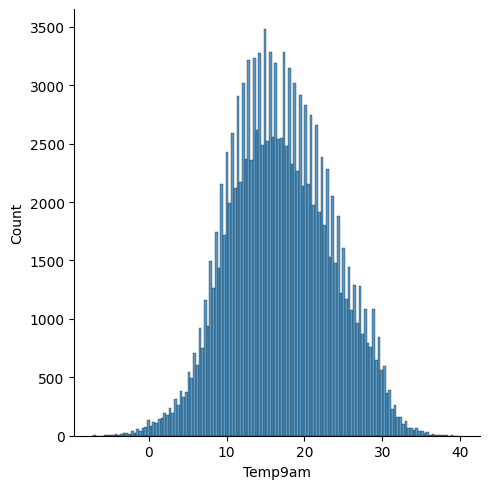

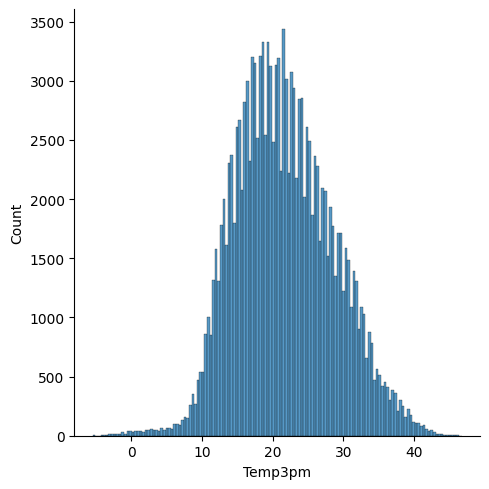

In [26]:
for col in df.columns :
  if col in num_columns:
    sns.displot(df[col])

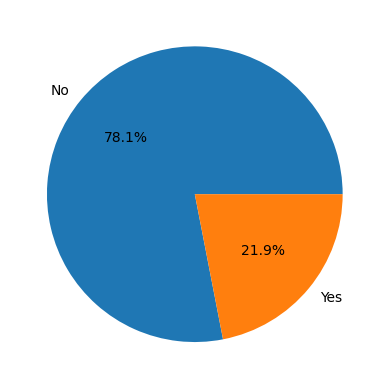

In [27]:
rain_count=df['RainTomorrow'].value_counts()
plt.pie(rain_count,labels=rain_count.index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='RainTomorrow', ylabel='MinTemp'>

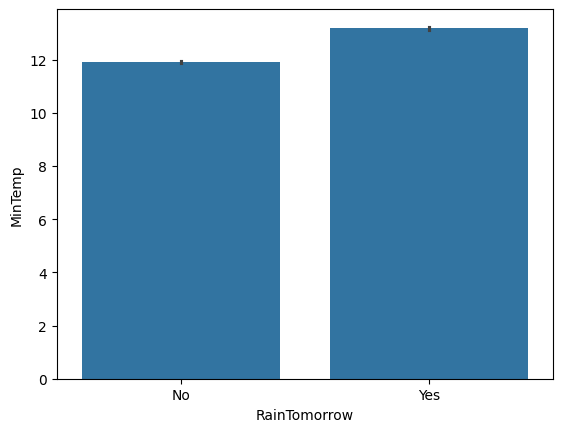

In [28]:
sns.barplot(y='MinTemp',x='RainTomorrow',data=df)


<Axes: xlabel='RainToday', ylabel='count'>

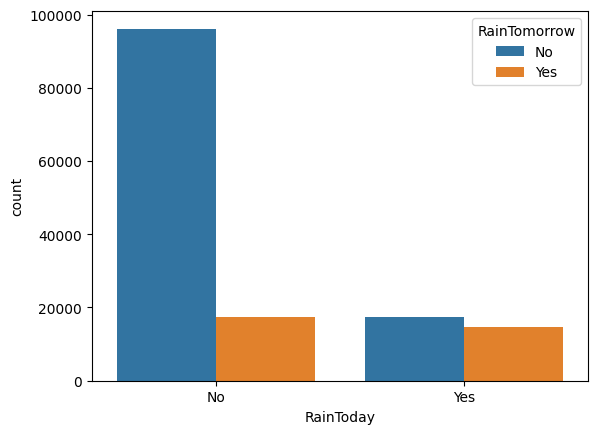

In [29]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)


<Figure size 1500x2000 with 0 Axes>

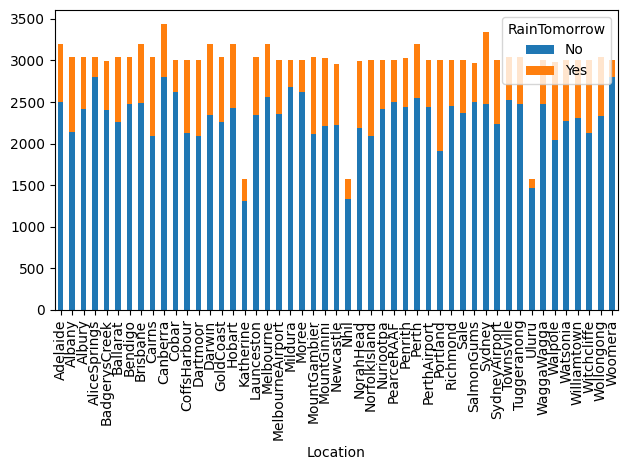

In [30]:
plt.figure(figsize=(15,20))
pd.crosstab(df['Location'], df['RainTomorrow']).plot(kind='bar',stacked=True)
plt.tight_layout()
plt.show()

<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

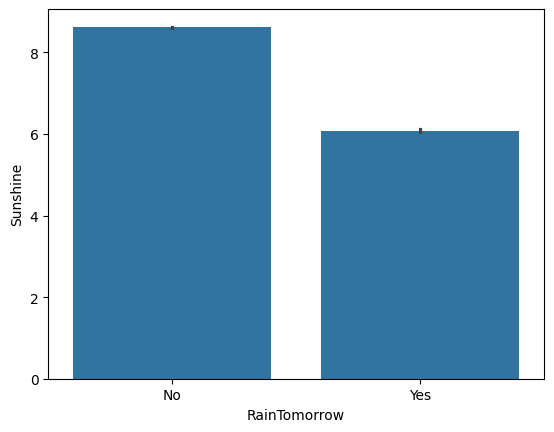

In [31]:
sns.barplot(y='Sunshine',x='RainTomorrow',data=df)

<Axes: xlabel='RainTomorrow', ylabel='Rainfall'>

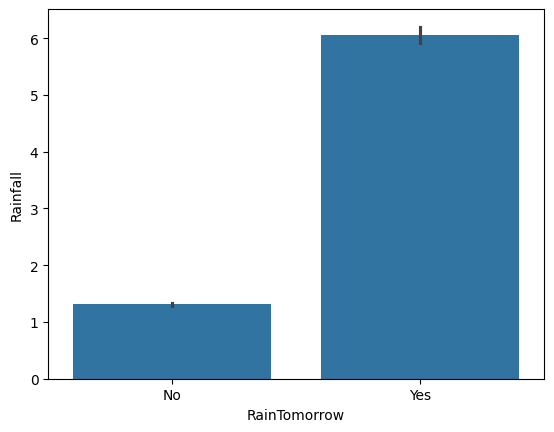

In [32]:
sns.barplot(x='RainTomorrow',y='Rainfall',data=df)

<Axes: xlabel='RainTomorrow', ylabel='WindGustDir'>

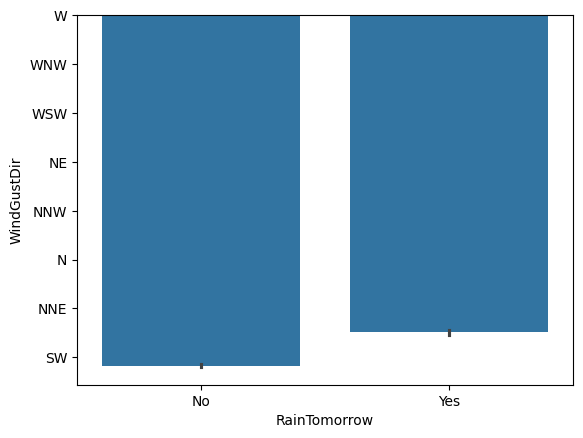

In [33]:
sns.barplot(x='RainTomorrow',y='WindGustDir',data=df)

<Axes: xlabel='WindGustDir', ylabel='Count'>

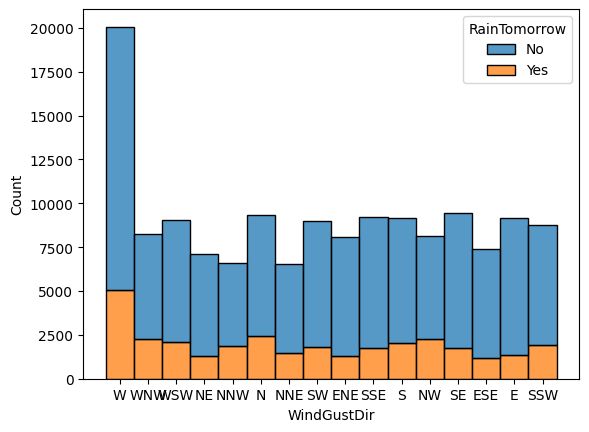

In [34]:
sns.histplot(x='WindGustDir',hue='RainTomorrow',multiple='stack',data=df)

<Axes: xlabel='RainTomorrow', ylabel='Evaporation'>

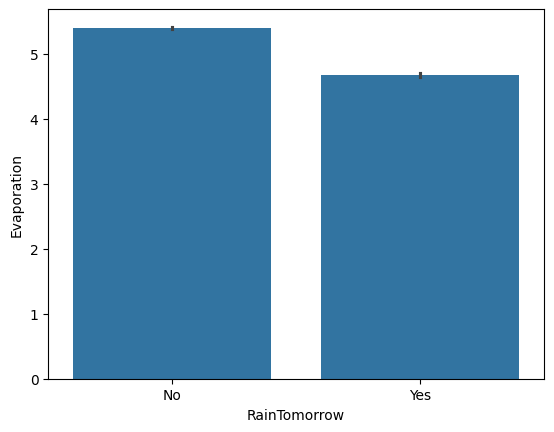

In [35]:
sns.barplot(x='RainTomorrow',y='Evaporation',data=df)

<Axes: xlabel='RainTomorrow', ylabel='Humidity9am'>

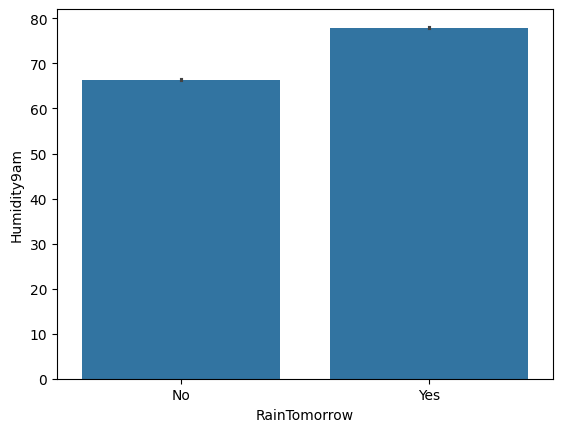

In [36]:
sns.barplot(x='RainTomorrow',y='Humidity9am',data=df)

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

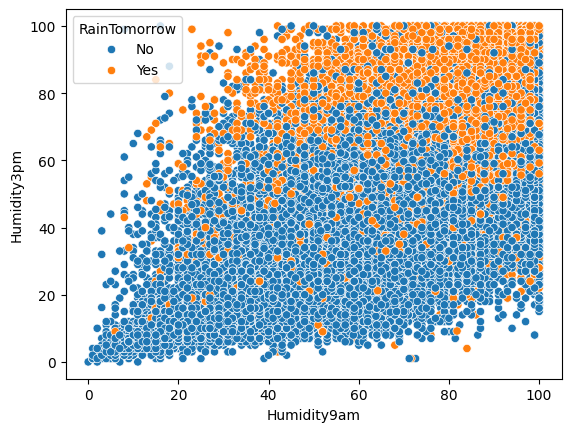

In [37]:
sns.scatterplot(data=df,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow')

<Axes: xlabel='RainTomorrow', ylabel='Pressure9am'>

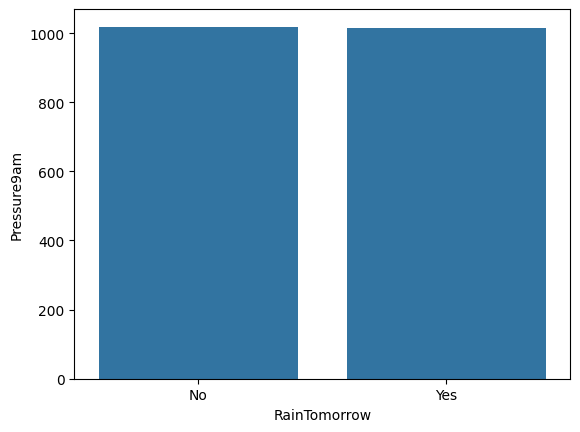

In [38]:
sns.barplot(x='RainTomorrow',y='Pressure9am',data=df)

<Axes: xlabel='RainTomorrow', ylabel='Pressure3pm'>

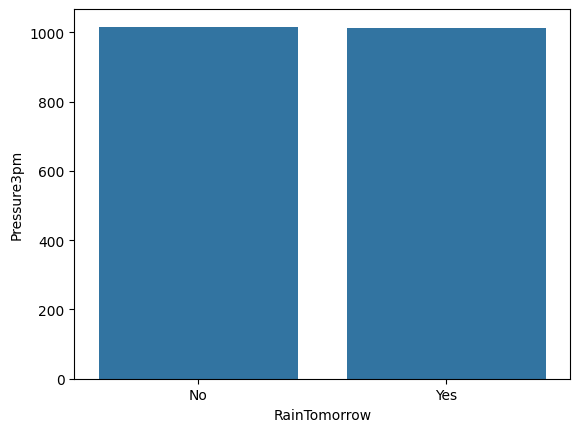

In [39]:
sns.barplot(x='RainTomorrow',y='Pressure3pm',data=df)

<Axes: xlabel='RainTomorrow', ylabel='Cloud9am'>

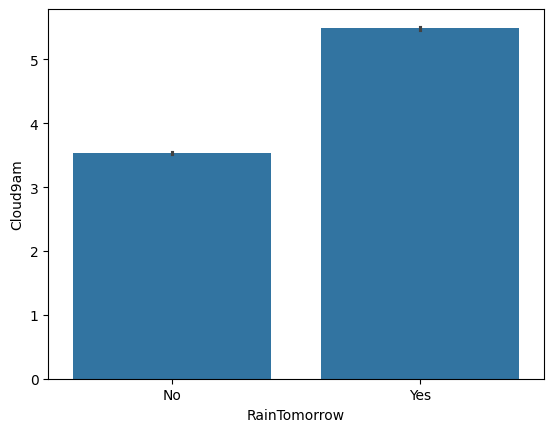

In [40]:
sns.barplot(x='RainTomorrow',y='Cloud9am',data=df)

#Encoding

In [42]:
for cat in cat_feature:
  print(df[cat].unique())
  print('###################')

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
###################
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
###################
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
###################
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
###################
['No' 'Yes']
###################
['No' 'Yes']
###################


In [43]:
def encoding(feature):
  le=LabelEncoder()
  df[feature]=le.fit_transform(df[feature])
  return le

In [44]:
for cat in cat_feature:
  encoding(cat)

In [45]:
for cat in cat_feature:
  print(df[cat].unique())
  print('###################')

[ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
###################
[13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
###################
[13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]
###################
[14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]
###################
[0 1]
###################
[0 1]
###################


In [46]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [47]:
corr=df.corr()

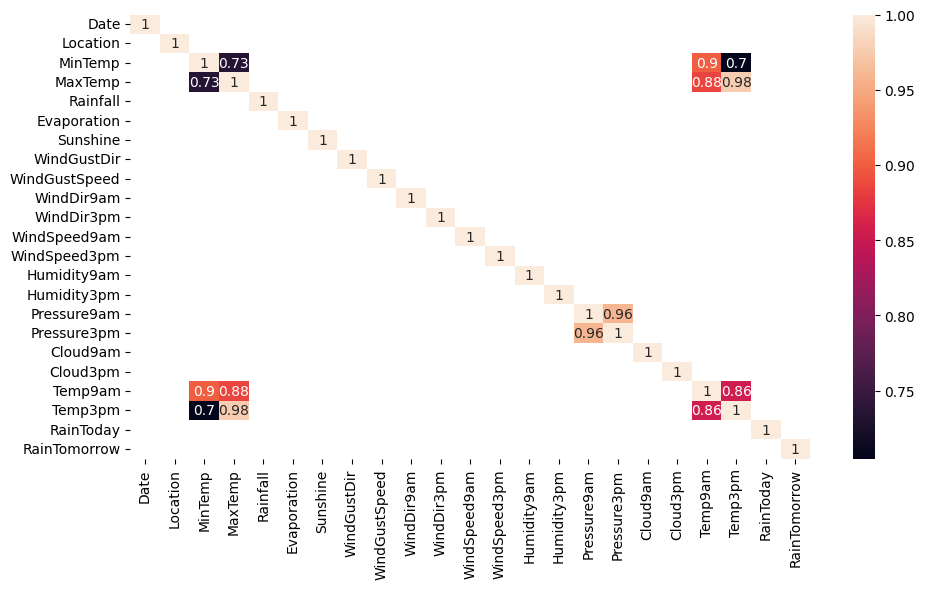

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,mask=corr<.7)
plt.tight_layout()

In [49]:
df.drop(['Temp9am','Temp3pm','Pressure3pm','Date','Location'],inplace=True,axis=1)


In [50]:
df.shape

(145280, 18)

#Check Outlier

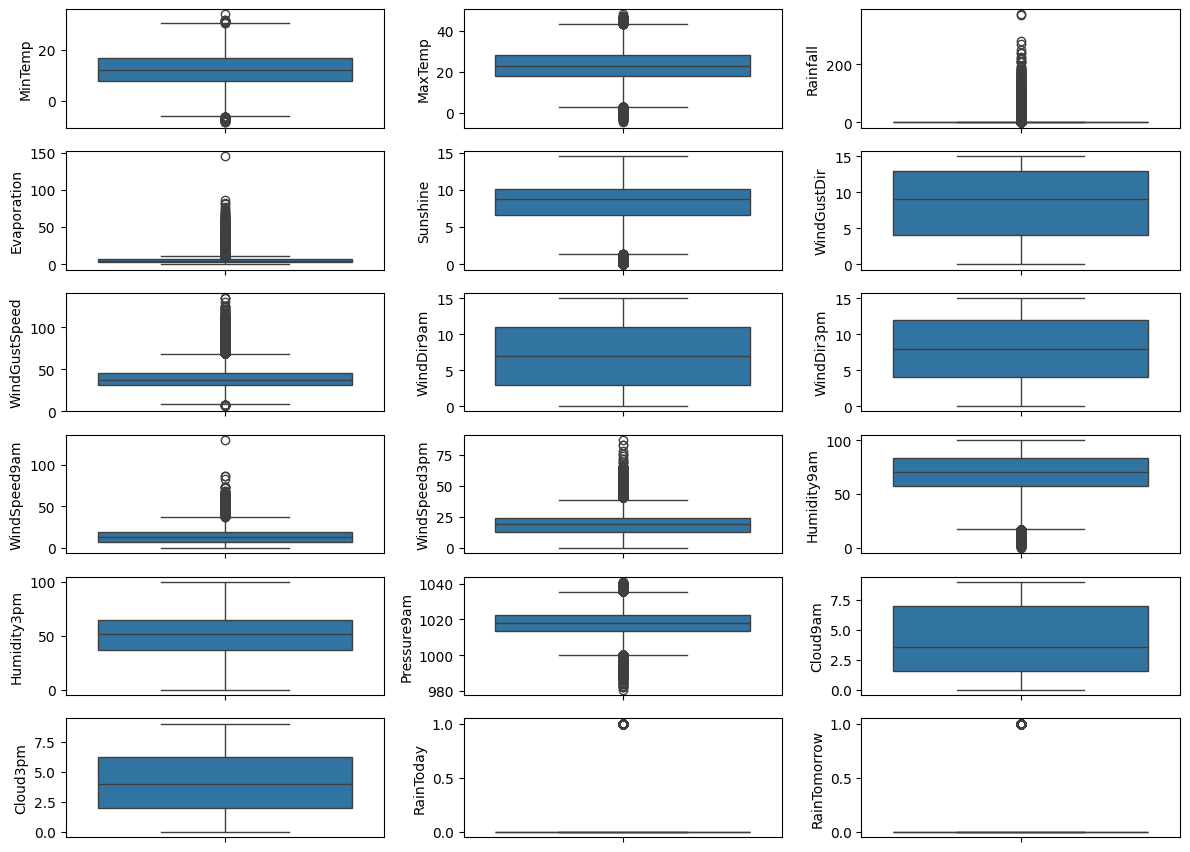

In [51]:
x = 1
plt.figure(figsize=(12, 10))
for col in df:
    plt.subplot(7, 3, x)
    sns.boxplot(df[col])
    x += 1

plt.tight_layout()
plt.show()

#Handle outlier

In [52]:
# Iterate through numeric columns
for col in df.columns:
    if col in num_columns:  # Ensure the column is numeric
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Determine lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Handle outliers: Filter rows within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]




#Check Unbalance

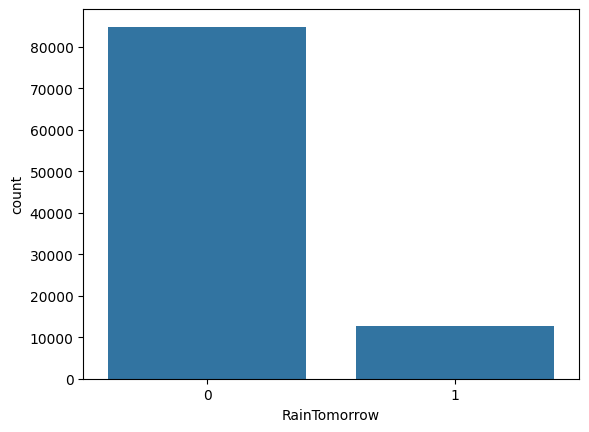

In [53]:
sns.countplot(x='RainTomorrow',data=df)
plt.show()

#check Skew

In [54]:
df.skew()

,0
MinTemp,0.059518
MaxTemp,0.157809
Rainfall,3.110696
Evaporation,0.443921
Sunshine,-0.414726
WindGustDir,-0.153214
WindGustSpeed,0.260624
WindDir9am,0.228714
WindDir3pm,-0.029647
WindSpeed9am,0.427041


In [55]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,84825
1,12735


In [56]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

#Split Data

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

#Handle unbalance

In [76]:
# smote=SMOTE(k_neighbors=5,random_state=42)
# x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

#handle skew

In [85]:
pt=PowerTransformer(method='yeo-johnson')
x_train_sk=pt.fit_transform(x_train)
x_valid_sk=pt.transform(x_valid)
x_test_sk=pt.transform(x_test)

#Scaling

In [86]:
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train_sk)
x_valid_sc=scaler.transform(x_valid_sk)
x_test_sc=scaler.transform(x_test_sk)

#Logistic

In [87]:
log_model=LogisticRegression()

params={
    'solver':['liblinear','sag','saga'],
    'max_iter':[1000, 5000, 10000],
     'C':[0.1,1,10]

}

grid=GridSearchCV(
    estimator=log_model,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [1000, 5000, 10000],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [88]:
grid.best_params_

{'C': 0.1, 'max_iter': 1000, 'solver': 'sag'}

In [89]:
final_model_log=grid.best_estimator_

In [90]:
y_tr_pred=final_model_log.predict(x_train_sc)
precision_score(y_train,y_tr_pred)

0.6281028368794326

In [91]:
y_val_pred=final_model_log.predict(x_valid_sc)
precision_score(y_valid,y_val_pred)

0.6410256410256411

#Bagging

In [92]:
estimators=[('log_reg',LogisticRegression())  , ('DT',DecisionTreeClassifier()) ]

In [93]:
voting_clf=VotingClassifier(estimators=estimators,voting='soft')

In [94]:
clf3=BaggingClassifier(
    estimator=voting_clf,
    n_estimators=50,
    random_state=42

)

In [95]:
clf3.fit(x_train_sc,y_train)

BaggingClassifier(estimator=VotingClassifier(estimators=[('log_reg',
                                                          LogisticRegression()),
                                                         ('DT',
                                                          DecisionTreeClassifier())],
                                             voting='soft'),
                  n_estimators=50, random_state=42)

In [98]:
y_tr_pred=clf3.predict(x_train_sc)
precision_score(y_train,y_tr_pred)

0.9821669818967846

In [99]:
y_val_pred=clf3.predict(x_valid_sc)
precision_score(y_valid,y_val_pred)

0.6701030927835051